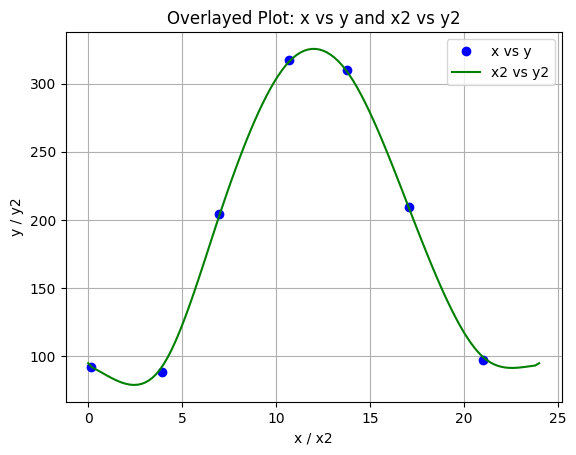

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern
from sklearn.exceptions import ConvergenceWarning

# ---- Your data ----
raw_data = np.array([
    [0.14806, 92.186], [0.93194, 92.625], [2.5025, 89.947], [2.85111, 87.761], [3.92917, 88.508],
    [4.14639, 87.69], [4.67417, 89.271], [4.72306, 88.169], [5.82667, 87.482], [6.03333, 134.152],
    [6.25333, 167.008], [6.39722, 158.951], [6.96806, 204.129], [6.96806, 205.819], [7.13667, 226.823],
    [7.74611, 251.427], [9.20972, 290.34], [9.38611, 296.95], [10.68278, 317.08], [10.83917, 318.573],
    [10.85417, 313.901], [11.59972, 322.522], [11.85694, 322.718], [11.85722, 323.711], [12.13861, 320.562],
    [13.04583, 320.325], [13.37389, 307.404], [13.43806, 312.705], [13.79, 309.838], [13.84194, 313.024],
    [14.15528, 306.818], [14.37111, 303.219], [14.77694, 292.664], [15.14722, 274.051], [15.28583, 277.503],
    [15.51444, 276.388], [15.51444, 277.266], [15.77222, 268.25], [16.06056, 256.215], [16.29833, 241.179],
    [16.74222, 222.624], [17.05556, 209.239], [17.15055, 198.281], [17.60056, 162.881], [18.47111, 106.367],
    [18.62444, 107.398], [18.81444, 105.372], [19.1025, 105.524], [19.32055, 104.21], [19.58361, 102.776],
    [19.81306, 102.816], [20.99278, 97.341], [23.19361, 91.801], [23.25222, 92.593], [23.43889, 94.396],
    [23.46806, 94.754], [23.46889, 94.883], [23.47667, 93.588], [23.71639, 92.321]
])

x_orig = data[:, 0].reshape(-1, 1)  # Time
y_orig = data[:, 1]  # Temperature (TB)
    

def interpolateGPR(data):
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    X = data[:, 0].reshape(-1, 1)  # Time
    y = data[:, 1]  # Temperature (TB)
    
    # Enforce that the first and last temps are the same
    start_time, end_time = 0, 24
    start_temp, end_temp = y[0], y[-1]
    mean_temp = (start_temp + end_temp) / 2  
    
    X_augmented = np.vstack(([start_time], X, [end_time]))
    y_augmented = np.hstack(([mean_temp], y, [mean_temp]))
    
    # Define the GPR kernel
    kernel = 100.0 * Matern(length_scale=6.0, nu=1.5)
    
    # Fit GPR model
    gp = GaussianProcessRegressor(
        kernel=kernel, alpha=100.0, n_restarts_optimizer=10)
    gp.fit(X_augmented, y_augmented)
    
    # Predict over the new grid
    X_new = np.linspace(0, 24, 120).reshape(-1, 1)
    y_pred, _ = gp.predict(X_new, return_std=True)
    
    # Post-process to ensure the first and last predictions match
    y_pred[0] = mean_temp
    y_pred[-1] = mean_temp
    
    # Rounding
    X_new_rounded = np.around(X_new.flatten(), 5).tolist()
    y_pred_rounded = np.round(y_pred, 3).tolist()
    
    return X_new_rounded, y_pred_rounded

def plot2(data):
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    X = data[:, 0].reshape(-1, 1)  # Time
    y = data[:, 1]  # Temperature (TB)
    
    # Enforce that the first and last temps are the same
    start_time, end_time = 0, 24
    start_temp, end_temp = y[0], y[-1]
    mean_temp = (start_temp + end_temp) / 2  
    
    X_augmented = np.vstack(([start_time], X, [end_time]))
    y_augmented = np.hstack(([mean_temp], y, [mean_temp]))

    kernel = ConstantKernel(10.0, (1e-3, 1e3)) * Matern(length_scale=6.0, length_scale_bounds=(1e-2, 6.0), nu=1.5)
    
    gp = GaussianProcessRegressor(kernel=kernel2, alpha=100, n_restarts_optimizer=10)
    gp.fit(X_augmented, y_augmented)
    
    # Predict over the new grid
    X_new = np.linspace(0, 24, 120).reshape(-1, 1)
    y_pred, _ = gp.predict(X_new, return_std=True)
    
    # Post-process to ensure the first and last predictions match
    y_pred[0] = mean_temp
    y_pred[-1] = mean_temp
    
    # Rounding
    X_new_rounded = np.around(X_new.flatten(), 5).tolist()
    y_pred_rounded = np.round(y_pred, 3).tolist()
    
    return X_new_rounded, y_pred_rounded

def plot3(data):
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    X = data[:, 0].reshape(-1, 1)  # Time
    y = data[:, 1]  # Temperature (TB)
    
    # Define the GPR kernel
    kernel = 100.0 * Matern(length_scale=6.0, nu=1.5)
    
    # Fit GPR model
    gp = GaussianProcessRegressor(
        kernel=kernel, alpha=100.0, n_restarts_optimizer=10)
    gp.fit(X, y)
    
    # Predict over the new grid
    X_new = np.linspace(0, 24, 120).reshape(-1, 1)
    y_pred, _ = gp.predict(X_new, return_std=True)

    # Rounding
    y_pred_rounded = np.round(y_pred, 3).tolist()
    
    return X_new, y_pred_rounded

def filterCloctime(data, hours):
    filtered = []

    last_cloctime = None

    for entry in data:
        cloctime = entry[0]

        if last_cloctime is None or cloctime - last_cloctime >= hours:
            filtered.append(entry)
            last_cloctime = cloctime

    # Convert filtered list back to numpy array before returning
    return np.array(filtered)

data = filterCloctime(raw_data, 3)
x, y = interpolateGPR(raw_data)
x2, y2 = interpolateGPR(data)

# One figure, two plots
plt.figure()
plt.plot(x_orig, y_orig, 'bo', label='x vs y')      # First plot
plt.plot(x2, y2, 'g-', label='x2 vs y2')  # Second plot

# Add titles and labels
plt.title("Overlayed Plot: x vs y and x2 vs y2")
plt.xlabel("x / x2")
plt.ylabel("y / y2")
plt.grid(True)
plt.legend()  # Show legend to distinguish lines

plt.show()